# 飞桨常规赛：中文新闻文本标题分类 9月第1名方案

> 非常荣幸取得了常规赛：中文新闻文本标题分类9月第1名，本项目将对采用的方案和具体的提升思路进行详细的介绍，希望能够对感兴趣的小伙伴们有所帮助！

> Github项目地址：[https://github.com/hchhtc123/News-Text-Classification](https://github.com/hchhtc123/News-Text-Classification)

![](https://ai-studio-static-online.cdn.bcebos.com/10ef32fa874649709fb24e2d8101b541d40b598a7d9745d39f15b2e6824c7395)

![](https://ai-studio-static-online.cdn.bcebos.com/086f99d09d064a52a69cc25b175bed066b78ac8063434ec084707ce85c38bf45)

# 上分之路：

**1.单模调优：**

基于PaddleNLP通过预训练模型roberta-wwm-ext-large的微调及基本调参达到单模最高分数为89.22236。

确定的较优模型参数为：batch_size = 300，max_seq_length = 48，epochs = 4，seed = 1024；优化器上选择AdamW优化器，learning_rate = 4e-5，weight_decay = 0.0

期间也尝试过使用不同的预训练模型，模型效果上：roberta-wwm-ext-large > nezha-large-wwm-chinese > skep_ernie_1.0_large_ch

对三个不同的最优模型预测结果根据分数排名，采用4：3：2的加权融合后可以达到89.37308的融合分数。

在训练时发现训练轮次过多时，会存在**过拟合**的风险降低模型的泛化能力。具体表现为：训练5个epoch甚至更多后验证集上分数上涨了但提交分数却下降明显。故训练epoch只选择了4个。

**2.伪标签和模型融合**

伪标签方法主要是将模型对无标签的测试数据的预测结果加入到训练中去从而增大训练数据量提升模型效果，适用于模型精度较高的情况。考虑到单模型准确度0.89+还算较高故采用了该技巧。

具体实现上主要是采用了roberta-wwm-ext-large、nezha-large-wwm-chinese和skep_ernie_1.0_large_ch三个模型，并取三者预测全部相同的结果label出来然后与测试集的正文内容拼接后处理为newtest.csv文件（格式为text_a,label）后加入到训练集中去。

通过将**第一轮伪标签法**得到的数据加入到roberta-wwm-ext-large的微调训练中后达到89.76304的分数，相较初始单模89.22，提升较大！

接着继续训练不同的预训练模型：roberta-wwm-ext-large 89.76304，nezha-large-wwm-chinese 89.65538，skep_ernie_1.0_large_ch 89.56088。通过**加权投票融合**后达到89.88146。接着继续通过取三者预测全部相同的结果label出来然后与测试集的正文内容拼接后处理为newtest1.csv文件（格式为text_a,label）后加入到训练集中去。

通过**第二轮伪标签**，roberta-wwm-ext-large达到89.85634，nezha-large-wwm-chinese达到89.82404，skep_ernie_1.0_large_ch达到89.73792。对第二轮得到的融合结果（89.88146)、roberta-wwm-ext-large结果（89.85634）及nezha-large-wwm-chinese（89.82404）按4：3：2的**加权投票融合**法后得到9月第一名分数89.95921。

在10月新一轮中开始尝试使用**第三和第四轮伪标签**，分别得到newtest2.csv和newtest3.csv的伪标签数据。通过第三和第四轮伪标签，roberta-wwm-ext-large最高达到89.98074，nezha-large-wwm-chinese最高达到89.95682，进行简单加权投票融合后达到目前最高的分数90.04414。

经测试伪标签和模型融合trick在第一和二轮时效果提升较优，但轮数增多后提升开始变得微弱些。

**3.进一步优化方向：**

a.针对训练存在的过拟合问题，可以考虑在划分训练和验证集时进行下数据均衡。同时可以尝试通过回译+同义词替换+相似句替换等的数据增强方法对训练数据进行扩增提升模型泛化能力。

b.伪标签技巧个人采用的是取多模型预测相同的部分，也可以尝试在预测输出结果时同时**输出预测结果的置信度**，取结果中置信度较高的作为伪标签加入训练，该方法在无标签数据标注中较为常见。

c.目前在单模上分数较低，可以考虑通过调参、**优化模型**等思路进一步提高单模的效果。[NLP文本分类 落地实战五大利器！](https://mp.weixin.qq.com/s/v4qpz3Izt1U5_qHXDdvz7A)

d.感兴趣的可以研究下**prompt或PET**,对这块感兴趣的可以参考下[格局打开，带你解锁 prompt 的花式用法](https://mp.weixin.qq.com/s/RFGbX1Np5KkVfij8d6AczQ) [NLP文本分类大杀器：PET范式](https://mp.weixin.qq.com/s/G7e6P0mwNX8IDNuPmwY15Q)，这块也是目前个人正在学习和尝试实践的地方。

e.更多技巧主要可以到天池或kaggle等数据科学平台或Github搜索，通过学习类似文本分类比赛的Top分享去进行学习和实践，以赛促学。

关于PaddleNLP的使用：建议多看官方最新文档 [PaddleNLP文档](https://paddlenlp.readthedocs.io/zh/latest/get_started/quick_start.html)

PaddleNLP的github地址：[https://github.com/PaddlePaddle/PaddleNLP](https://github.com/PaddlePaddle/PaddleNLP) 有问题的话可以在github上提issue，会有专人回答。

# 一.方案介绍

## 1.1 赛题简介：

文本分类是借助计算机对文本集(或其他实体或物件)按照一定的分类体系或标准进行自动分类标记。本次比赛为新闻标题文本分类 ，选手需要根据提供的新闻标题文本和类别标签训练一个新闻分类模型，然后对测试集的新闻标题文本进行分类，评价指标上使用Accuracy = 分类正确数量 / 需要分类总数量。同时本次参赛选手需使用飞桨框架和飞桨文本领域核心开发库PaddleNLP，PaddleNLP具备简洁易用的文本领域全流程API、多场景的应用示例、非常丰富的预训练模型，深度适配飞桨框架2.x版本。

比赛传送门：[常规赛：中文新闻文本标题分类](https://aistudio.baidu.com/aistudio/competition/detail/107)

## 1.2 数据介绍：

THUCNews是根据新浪新闻RSS订阅频道2005~2011年间的历史数据筛选过滤生成，包含74万篇新闻文档（2.19 GB），均为UTF-8纯文本格式。本次比赛数据集在原始新浪新闻分类体系的基础上，重新整合划分出14个候选分类类别：财经、彩票、房产、股票、家居、教育、科技、社会、时尚、时政、体育、星座、游戏、娱乐。提供训练数据共832471条。

比赛提供数据集的格式：训练集和验证集格式：原文标题+\t+标签，测试集格式：原文标题。

## 1.3 模型思路：

赛题为一道较常规的短文本多分类任务，本项目主要基于PaddleNLP通过预训练模型在提供的训练数据上进行微调完成新闻14分类模型的训练与优化，最后利用训练好的模型对测试数据进行预测并生成提交结果文件，接着主要通过伪标签和结果融合trick对效果进行进一步提升。

注意本项目运行需要选择至尊版的GPU环境！若显存不足注意适当改小下batchsize！

BERT前置知识补充：[【原理】经典的预训练模型-BERT](https://aistudio.baidu.com/aistudio/projectdetail/2297740)

![](https://ai-studio-static-online.cdn.bcebos.com/adafc232c53f49258d410e68e3863f1de6747547a9d34ca6b6bf8f4891f4621b)

![](https://ai-studio-static-online.cdn.bcebos.com/b3c5b8ca36e84dcda5a9f1b35b1c6123caf703a1d5b34e1db841bcfdeac2d0d5)

# 二.数据读取与分析

In [1]:
# 进入比赛数据集存放目录
%cd /home/aistudio/data/data103654/

/home/aistudio/data/data103654


In [2]:
# 使用pandas读取数据集
import pandas as pd
train = pd.read_table('train.txt', sep='\t',header=None)  # 训练集
dev = pd.read_table('dev.txt', sep='\t',header=None)      # 验证集（官方已经划分的）
test = pd.read_table('test.txt', sep='\t',header=None)    # 测试集

In [3]:
# 读取伪标签数据（将模型对无标签的测试集的预测结果加入到训练中去，具体可以看前面上分之路的说明）
# newtest.csv对应第一轮伪标签,newtest1.csv对应第二轮伪标签，newtest2.csv对应第三轮伪标签，newtest3.csv对应第四轮伪标签。 第一轮使用时提升较大，后面提升逐渐微弱
newtest = pd.read_csv('/home/aistudio/work/newtest3.csv')

In [4]:
# 由于数据集存放时无列名，因此手动添加列名便于对数据进行更好处理
train.columns = ["text_a",'label']
dev.columns = ["text_a",'label']
test.columns = ["text_a"]

In [5]:
# 查看训练集数据，共752471条
train

,text_a,label
0,网易第三季度业绩低于分析师预期,科技
1,巴萨1年前地狱重现这次却是天堂 再赴魔鬼客场必翻盘,体育
2,美国称支持向朝鲜提供紧急人道主义援助,时政
3,增资交银康联 交行夺参股险商首单,股票
4,午盘：原材料板块领涨大盘,股票
...,...,...
752466,天津女排奇迹之源竟在场边 他是五冠王真正核心,体育
752467,北电网络专利拍卖推迟：可能分拆6部分拍卖,科技
752468,Spirit AeroSystems债券发行价确定,股票
752469,陆慧明必发火线：法兰克福无胜 曼联国米顺利过关,彩票


In [6]:
# 查看验证集数据，共80000条
dev

,text_a,label
0,网民市民集体幻想中奖后如果你中了9000万怎么办,彩票
1,PVC期货有望5月挂牌,财经
2,午时三刻新作《幻神录―宿命情缘》,游戏
3,欧司朗LLFY网络提供一站式照明解决方案,家居
4,试探北京楼市向何方：排不完的队 涨不够的价,房产
...,...,...
79995,王大雷看国足比赛预测比分我觉得是2-0或者3-1,体育
79996,克雷扎回归猛龙势如破竹希尔遭驱逐太阳惨败51分,体育
79997,王建宙将与台商共创4G网络商机,科技
79998,普京突访食品超市做调查不满高价猪肉(图),时政


In [7]:
# 查看测试集数据，共83599条
test

,text_a
0,北京君太百货璀璨秋色 满100省353020元
1,教育部：小学高年级将开始学习性知识
2,专业级单反相机 佳能7D单机售价9280元
3,星展银行起诉内地客户 银行强硬客户无奈
4,脱离中国的实际 强压人民币大幅升值只能是梦想
...,...
83594,Razer杯DotA精英挑战赛8月震撼登场
83595,经济数据好转吹散人民币贬值预期
83596,抵押率抵押物双控政策 刘明康支招房产贷款
83597,8000万像素 利图发布Aptus-II 12数码后背


In [8]:
# 拼接训练和验证集，便于进行统计分析
total = pd.concat([train,dev],axis=0)

In [9]:
# 总类别标签分布统计
total['label'].value_counts()

科技    162245
股票    153949
体育    130982
娱乐     92228
时政     62867
社会     50541
教育     41680
财经     36963
家居     32363
游戏     24283
房产     19922
时尚     13335
彩票      7598
星座      3515
Name: label, dtype: int64

In [ ]:
# 全局设置解决matplotlib中文显示错误的问题，参考：https://aistudio.baidu.com/aistudio/projectdetail/1658980
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.font_manager as font_manager

# 设置显示中文
matplotlib.rcParams['font.sans-serif'] = ['FZSongYi-Z13S'] # 指定默认字体
matplotlib.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
# 设置字体大小
matplotlib.rcParams['font.size'] = 16

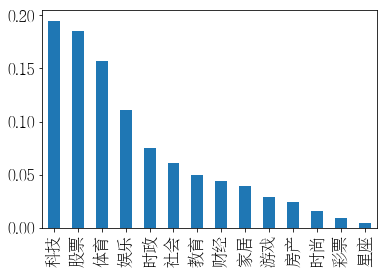

In [10]:
# 可视化类别标签分布情况
total['label'].value_counts(normalize=True).plot(kind='bar');

In [11]:
# 文本长度统计分析,通过分析可以看出文本较短，最长为48
total['text_a'].map(len).describe()

count    832471.000000
mean         19.388112
std           4.097139
min           2.000000
25%          17.000000
50%          20.000000
75%          23.000000
max          48.000000
Name: text_a, dtype: float64

In [12]:
# 对测试集的长度统计分析，可以看出在长度上分布与训练数据相近
test['text_a'].map(len).describe()

count    83599.000000
mean        19.815022
std          3.883845
min          3.000000
25%         17.000000
50%         20.000000
75%         23.000000
max         84.000000
Name: text_a, dtype: float64

In [13]:
# 拼接训练集和伪标签数据，通过加入伪标签数据，增大训练数据量提升模型泛化能力
train = pd.concat([train,newtest],axis=0)

In [14]:
# 保存处理后的数据集文件
train.to_csv('train.csv', sep='\t', index=False)  # 保存训练集，格式为text_a,label，以\t分隔开
dev.to_csv('dev.csv', sep='\t', index=False)      # 保存验证集，格式为text_a,label，以\t分隔开
test.to_csv('test.csv', sep='\t', index=False)    # 保存测试集，格式为text_a，以\t分隔开

# 三.基于PaddleNLP构建基线模型

![](https://ai-studio-static-online.cdn.bcebos.com/75742955d912447c948bb679994a09039af5f85cfb554715be56c970db5ec3f6)

## 3.1 前置环境准备

In [15]:
# 导入所需的第三方库
import math
import numpy as np
import os
import collections
from functools import partial
import random
import time
import inspect
import importlib
from tqdm import tqdm
import paddle
import paddle.nn as nn
import paddle.nn.functional as F
from paddle.io import IterableDataset
from paddle.utils.download import get_path_from_url

In [16]:
# 下载最新版本的paddlenlp
!pip install --upgrade paddlenlp

In [17]:
# 导入paddlenlp所需的相关包
import paddlenlp as ppnlp
from paddlenlp.data import JiebaTokenizer, Pad, Stack, Tuple, Vocab
from paddlenlp.datasets import MapDataset
from paddle.dataset.common import md5file
from paddlenlp.datasets import DatasetBuilder

## 3.2 定义要进行微调的预训练模型

在预训练模型选择上，选择了不同的三个中文领域效果较优的预训练模型，效果对比：roberta-wwm-ext-large > nezha-large-wwm-chinese > skep_ernie_1.0_large_ch

In [34]:
# 此次使用在中文领域效果较优的roberta-wwm-ext-large模型，预训练模型一般“大力出奇迹”，选用大的预训练模型可以取得比base模型更优的效果
MODEL_NAME = "roberta-wwm-ext-large"
# 只需指定想要使用的模型名称和文本分类的类别数即可完成Fine-tune网络定义，通过在预训练模型后拼接上一个全连接网络（Full Connected）进行分类
model = ppnlp.transformers.RobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_classes=14) # 此次分类任务为14分类任务，故num_classes设置为14
# 定义模型对应的tokenizer，tokenizer可以把原始输入文本转化成模型model可接受的输入数据格式。需注意tokenizer类要与选择的模型相对应，具体可以查看PaddleNLP相关文档
tokenizer = ppnlp.transformers.RobertaTokenizer.from_pretrained(MODEL_NAME)

[2021-10-03 16:50:33,950] [    INFO] - Downloading https://paddlenlp.bj.bcebos.com/models/transformers/roberta_large/roberta_chn_large.pdparams and saved to /home/aistudio/.paddlenlp/models/roberta-wwm-ext-large
[2021-10-03 16:50:33,954] [    INFO] - Downloading roberta_chn_large.pdparams from https://paddlenlp.bj.bcebos.com/models/transformers/roberta_large/roberta_chn_large.pdparams
100%|██████████| 1271615/1271615 [00:17<00:00, 71805.67it/s]
[2021-10-03 16:51:02,377] [    INFO] - Downloading https://paddlenlp.bj.bcebos.com/models/transformers/roberta_large/vocab.txt and saved to /home/aistudio/.paddlenlp/models/roberta-wwm-ext-large
[2021-10-03 16:51:02,380] [    INFO] - Downloading vocab.txt from https://paddlenlp.bj.bcebos.com/models/transformers/roberta_large/vocab.txt
100%|██████████| 107/107 [00:00<00:00, 4053.97it/s]


In [18]:
# nezha-large-wwm-chinese模型
# 指定模型名称，一键加载模型
# model = ppnlp.transformers.NeZhaForSequenceClassification.from_pretrained('nezha-large-wwm-chinese', num_classes=14)
# 同样地，通过指定模型名称一键加载对应的Tokenizer，用于处理文本数据，如切分token，转token_id等
# tokenizer = ppnlp.transformers.NeZhaTokenizer.from_pretrained('nezha-large-wwm-chinese')

[2021-10-04 17:55:57,524] [    INFO] - Downloading https://paddlenlp.bj.bcebos.com/models/transformers/nezha/nezha-large-wwm-chinese.pdparams and saved to /home/aistudio/.paddlenlp/models/nezha-large-wwm-chinese
[2021-10-04 17:55:57,538] [    INFO] - Downloading nezha-large-wwm-chinese.pdparams from https://paddlenlp.bj.bcebos.com/models/transformers/nezha/nezha-large-wwm-chinese.pdparams
100%|██████████| 1358267/1358267 [00:18<00:00, 71883.73it/s]
[2021-10-04 17:56:28,001] [    INFO] - Downloading http://paddlenlp.bj.bcebos.com/models/transformers/nezha/nezha-chinese-vocab.txt and saved to /home/aistudio/.paddlenlp/models/nezha-large-wwm-chinese
[2021-10-04 17:56:28,004] [    INFO] - Downloading nezha-chinese-vocab.txt from http://paddlenlp.bj.bcebos.com/models/transformers/nezha/nezha-chinese-vocab.txt
100%|██████████| 107/107 [00:00<00:00, 3590.04it/s]


In [18]:
# skep_ernie_1.0_large_ch模型
# 指定模型名称，一键加载模型
# model = ppnlp.transformers.SkepForSequenceClassification.from_pretrained(pretrained_model_name_or_path="skep_ernie_1.0_large_ch", num_classes=14)
# 同样地，通过指定模型名称一键加载对应的Tokenizer，用于处理文本数据，如切分token，转token_id等
# tokenizer = ppnlp.transformers.SkepTokenizer.from_pretrained(pretrained_model_name_or_path="skep_ernie_1.0_large_ch")

[2021-09-30 08:14:36,944] [    INFO] - Downloading https://paddlenlp.bj.bcebos.com/models/transformers/skep/skep_ernie_1.0_large_ch.pdparams and saved to /home/aistudio/.paddlenlp/models/skep_ernie_1.0_large_ch
[2021-09-30 08:14:36,947] [    INFO] - Downloading skep_ernie_1.0_large_ch.pdparams from https://paddlenlp.bj.bcebos.com/models/transformers/skep/skep_ernie_1.0_large_ch.pdparams
100%|██████████| 1238309/1238309 [00:17<00:00, 72100.73it/s]
[2021-09-30 08:15:05,514] [    INFO] - Downloading https://paddlenlp.bj.bcebos.com/models/transformers/skep/skep_ernie_1.0_large_ch.vocab.txt and saved to /home/aistudio/.paddlenlp/models/skep_ernie_1.0_large_ch
[2021-09-30 08:15:05,517] [    INFO] - Downloading skep_ernie_1.0_large_ch.vocab.txt from https://paddlenlp.bj.bcebos.com/models/transformers/skep/skep_ernie_1.0_large_ch.vocab.txt
100%|██████████| 55/55 [00:00<00:00, 3977.22it/s]


PaddleNLP不仅支持RoBERTa预训练模型，还支持ERNIE、BERT、Electra等预训练模型。具体可以查看：[PaddleNLP模型](https://paddlenlp.readthedocs.io/zh/latest/source/paddlenlp.transformers.html)

下表汇总了目前PaddleNLP支持的各类预训练模型。用户可以使用PaddleNLP提供的模型，完成问答、序列分类、token分类等任务。同时还提供了22种预训练的参数权重供用户使用，其中包含了11种中文语言模型的预训练权重。

| Model | Tokenizer| Supported Task| Model Name|
|---|---|---|---|
| [BERT](https://arxiv.org/abs/1810.04805) | BertTokenizer|BertModel<br> BertForQuestionAnswering<br> BertForSequenceClassification<br>BertForTokenClassification| `bert-base-uncased`<br> `bert-large-uncased` <br>`bert-base-multilingual-uncased` <br>`bert-base-cased`<br> `bert-base-chinese`<br> `bert-base-multilingual-cased`<br> `bert-large-cased`<br> `bert-wwm-chinese`<br> `bert-wwm-ext-chinese` |
|[ERNIE](https://arxiv.org/abs/1904.09223)|ErnieTokenizer<br>ErnieTinyTokenizer|ErnieModel<br> ErnieForQuestionAnswering<br> ErnieForSequenceClassification<br> ErnieForTokenClassification| `ernie-1.0`<br> `ernie-tiny`<br> `ernie-2.0-en`<br> `ernie-2.0-large-en`|
|[RoBERTa](https://arxiv.org/abs/1907.11692)|RobertaTokenizer| RobertaModel<br>RobertaForQuestionAnswering<br>RobertaForSequenceClassification<br>RobertaForTokenClassification| `roberta-wwm-ext`<br> `roberta-wwm-ext-large`<br> `rbt3`<br> `rbtl3`|
|[ELECTRA](https://arxiv.org/abs/2003.10555) |ElectraTokenizer| ElectraModel<br>ElectraForSequenceClassification<br>ElectraForTokenClassification<br>|`electra-small`<br> `electra-base`<br> `electra-large`<br> `chinese-electra-small`<br> `chinese-electra-base`<br>|

注：其中中文的预训练模型有 `bert-base-chinese, bert-wwm-chinese, bert-wwm-ext-chinese, ernie-1.0, ernie-tiny, roberta-wwm-ext, roberta-wwm-ext-large, rbt3, rbtl3, chinese-electra-base, chinese-electra-small` 等。

![](https://ai-studio-static-online.cdn.bcebos.com/0e7623086e034228a1f7e9db834536486ba42d00823749f3bb083f3e25cdf7d9)

## 3.3 数据读取和处理

In [19]:
# 定义要进行分类的14个类别
label_list=list(train.label.unique())
print(label_list)

['科技', '体育', '时政', '股票', '娱乐', '教育', '家居', '财经', '房产', '社会', '游戏', '彩票', '星座', '时尚']


In [20]:
# 定义数据集对应文件及其文件存储格式
class NewsData(DatasetBuilder):
    SPLITS = {
        'train': 'train.csv',  # 训练集
        'dev': 'dev.csv',      # 验证集
    }

    def _get_data(self, mode, **kwargs):
        filename = self.SPLITS[mode]
        return filename

    def _read(self, filename):
        """读取数据"""
        with open(filename, 'r', encoding='utf-8') as f:
            head = None
            for line in f:
                data = line.strip().split("\t")    # 以'\t'分隔各列
                if not head:
                    head = data
                else:
                    text_a, label = data
                    yield {"text_a": text_a, "label": label}  # 此次设置数据的格式为：text_a,label，可以根据具体情况进行修改

    def get_labels(self):
        return label_list   # 类别标签

In [21]:
# 定义数据集加载函数
def load_dataset(name=None,
                 data_files=None,
                 splits=None,
                 lazy=None,
                 **kwargs):
   
    reader_cls = NewsData  # 加载定义的数据集格式
    print(reader_cls)
    if not name:
        reader_instance = reader_cls(lazy=lazy, **kwargs)
    else:
        reader_instance = reader_cls(lazy=lazy, name=name, **kwargs)

    datasets = reader_instance.read_datasets(data_files=data_files, splits=splits)
    return datasets

In [22]:
# 加载训练和验证集
train_ds, dev_ds = load_dataset(splits=["train", "dev"])

<class '__main__.NewsData'>


In [23]:
# 定义数据加载和处理函数
def convert_example(example, tokenizer, max_seq_length=128, is_test=False):
    qtconcat = example["text_a"]
    encoded_inputs = tokenizer(text=qtconcat, max_seq_len=max_seq_length)  # tokenizer处理为模型可接受的格式 
    input_ids = encoded_inputs["input_ids"]
    token_type_ids = encoded_inputs["token_type_ids"]

    if not is_test:
        label = np.array([example["label"]], dtype="int64")
        return input_ids, token_type_ids, label
    else:
        return input_ids, token_type_ids

# 定义数据加载函数dataloader
def create_dataloader(dataset,
                      mode='train',
                      batch_size=1,
                      batchify_fn=None,
                      trans_fn=None):
    if trans_fn:
        dataset = dataset.map(trans_fn)

    shuffle = True if mode == 'train' else False
    # 训练数据集随机打乱，测试数据集不打乱
    if mode == 'train':
        batch_sampler = paddle.io.DistributedBatchSampler(
            dataset, batch_size=batch_size, shuffle=shuffle)
    else:
        batch_sampler = paddle.io.BatchSampler(
            dataset, batch_size=batch_size, shuffle=shuffle)

    return paddle.io.DataLoader(
        dataset=dataset,
        batch_sampler=batch_sampler,
        collate_fn=batchify_fn,
        return_list=True)

In [24]:
# 参数设置：
# 批处理大小，显存如若不足的话可以适当改小该值
# 注意该场景下若使用nezha-large-wwm-chinese需将batch_size修改为256，其他模型则为300。否则容易出现爆显存问题
batch_size = 300
# 文本序列最大截断长度，需要根据文本具体长度进行确定，最长不超过512。 通过文本长度分析可以看出文本长度最大为48，故此处设置为48
max_seq_length = 48

In [25]:
# 将数据处理成模型可读入的数据格式
trans_func = partial(
    convert_example,
    tokenizer=tokenizer,
    max_seq_length=max_seq_length)

batchify_fn = lambda samples, fn=Tuple(
    Pad(axis=0, pad_val=tokenizer.pad_token_id),  # input_ids
    Pad(axis=0, pad_val=tokenizer.pad_token_type_id),  # token_type_ids
    Stack()  # labels
): [data for data in fn(samples)]

# 训练集迭代器
train_data_loader = create_dataloader(
    train_ds,
    mode='train',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)

# 验证集迭代器
dev_data_loader = create_dataloader(
    dev_ds,
    mode='dev',
    batch_size=batch_size,
    batchify_fn=batchify_fn,
    trans_fn=trans_func)

## 3.4 设置Fine-Tune优化策略，接入评价指标

适用于BERT这类Transformer模型的学习率为warmup的动态学习率。

![](https://ai-studio-static-online.cdn.bcebos.com/96164785831147b382bfc8d54161ec8794571c1528b34fa4b126e6d3d109be3d)

In [26]:
# 定义超参，loss，优化器等
from paddlenlp.transformers import LinearDecayWithWarmup

# 定义训练配置参数：
# 定义训练过程中的最大学习率
learning_rate = 4e-5
# 训练轮次
epochs = 4
# 学习率预热比例
warmup_proportion = 0.1
# 权重衰减系数，类似模型正则项策略，避免模型过拟合
weight_decay = 0.0

num_training_steps = len(train_data_loader) * epochs
lr_scheduler = LinearDecayWithWarmup(learning_rate, num_training_steps, warmup_proportion)

# AdamW优化器
optimizer = paddle.optimizer.AdamW(
    learning_rate=lr_scheduler,
    parameters=model.parameters(),
    weight_decay=weight_decay,
    apply_decay_param_fun=lambda x: x in [
        p.name for n, p in model.named_parameters()
        if not any(nd in n for nd in ["bias", "norm"])
    ])

criterion = paddle.nn.loss.CrossEntropyLoss()  # 交叉熵损失函数
metric = paddle.metric.Accuracy()              # accuracy评价指标

## 3.5 模型训练与评估

ps：模型训练时，可以通过在终端输入nvidia-smi命令或者通过点击底部‘性能监控’选项查看显存的占用情况，适当调整好batchsize，防止出现显存不足意外暂停的情况。

In [27]:
# 定义模型训练验证评估函数
@paddle.no_grad()
def evaluate(model, criterion, metric, data_loader):
    model.eval()
    metric.reset()
    losses = []
    for batch in data_loader:
        input_ids, token_type_ids, labels = batch
        logits = model(input_ids, token_type_ids)
        loss = criterion(logits, labels)
        losses.append(loss.numpy())
        correct = metric.compute(logits, labels)
        metric.update(correct)
        accu = metric.accumulate()
    print("eval loss: %.5f, accu: %.5f" % (np.mean(losses), accu))  # 输出验证集上评估效果
    model.train()
    metric.reset()
    return accu  # 返回准确率

In [28]:
# 固定随机种子便于结果的复现
seed = 1024
random.seed(seed)
np.random.seed(seed)
paddle.seed(seed)

ps:模型训练时可以通过在终端输入nvidia-smi命令或通过底部右下的性能监控选项查看显存占用情况，显存不足的话要适当调整好batchsize的值。

In [29]:
# 模型训练：
import paddle.nn.functional as F

save_dir = "checkpoint"
if not  os.path.exists(save_dir):
    os.makedirs(save_dir)

pre_accu=0
accu=0
global_step = 0
for epoch in range(1, epochs + 1):
    for step, batch in enumerate(train_data_loader, start=1):
        input_ids, segment_ids, labels = batch
        logits = model(input_ids, segment_ids)
        loss = criterion(logits, labels)
        probs = F.softmax(logits, axis=1)
        correct = metric.compute(probs, labels)
        metric.update(correct)
        acc = metric.accumulate()

        global_step += 1
        if global_step % 10 == 0 :
            print("global step %d, epoch: %d, batch: %d, loss: %.5f, acc: %.5f" % (global_step, epoch, step, loss, acc))
        loss.backward()
        optimizer.step()
        lr_scheduler.step()
        optimizer.clear_grad()
    # 每轮结束对验证集进行评估
    accu = evaluate(model, criterion, metric, dev_data_loader)
    print(accu)
    if accu > pre_accu:
        # 保存较上一轮效果更优的模型参数
        save_param_path = os.path.join(save_dir, 'model_state.pdparams')  # 保存模型参数
        paddle.save(model.state_dict(), save_param_path)
        pre_accu=accu
tokenizer.save_pretrained(save_dir)

In [30]:
# 加载在验证集上效果最优的一轮的模型参数
import os
import paddle

params_path = 'checkpoint/model_state.pdparams'
if params_path and os.path.isfile(params_path):
    # 加载模型参数
    state_dict = paddle.load(params_path)
    model.set_dict(state_dict)
    print("Loaded parameters from %s" % params_path)

Loaded parameters from checkpoint/model_state.pdparams


In [31]:
# 测试最优模型参数在验证集上的分数
evaluate(model, criterion, metric, dev_data_loader)

eval loss: 0.01453, accu: 0.99587


0.995875

## 3.6 模型预测

In [32]:
# 定义模型预测函数
def predict(model, data, tokenizer, label_map, batch_size=1):
    examples = []
    # 将输入数据（list格式）处理为模型可接受的格式
    for text in data:
        input_ids, segment_ids = convert_example(
            text,
            tokenizer,
            max_seq_length=128,
            is_test=True)
        examples.append((input_ids, segment_ids))

    batchify_fn = lambda samples, fn=Tuple(
        Pad(axis=0, pad_val=tokenizer.pad_token_id),  # input id
        Pad(axis=0, pad_val=tokenizer.pad_token_id),  # segment id
    ): fn(samples)

    # Seperates data into some batches.
    batches = []
    one_batch = []
    for example in examples:
        one_batch.append(example)
        if len(one_batch) == batch_size:
            batches.append(one_batch)
            one_batch = []
    if one_batch:
        # The last batch whose size is less than the config batch_size setting.
        batches.append(one_batch)

    results = []
    model.eval()
    for batch in batches:
        input_ids, segment_ids = batchify_fn(batch)
        input_ids = paddle.to_tensor(input_ids)
        segment_ids = paddle.to_tensor(segment_ids)
        logits = model(input_ids, segment_ids)
        probs = F.softmax(logits, axis=1)
        idx = paddle.argmax(probs, axis=1).numpy()
        idx = idx.tolist()
        labels = [label_map[i] for i in idx]
        results.extend(labels)
    return results  # 返回预测结果

In [33]:
# 定义要进行分类的类别
label_list=list(train.label.unique())
label_map = { 
    idx: label_text for idx, label_text in enumerate(label_list)
}
print(label_map)

{0: '科技', 1: '体育', 2: '时政', 3: '股票', 4: '娱乐', 5: '教育', 6: '家居', 7: '财经', 8: '房产', 9: '社会', 10: '游戏', 11: '彩票', 12: '星座', 13: '时尚'}


In [34]:
# 读取要进行预测的测试集文件
test = pd.read_csv('./test.csv',sep='\t')  

In [35]:
# 定义对数据的预处理函数,处理为模型输入指定list格式
def preprocess_prediction_data(data):
    examples = []
    for text_a in data:
        examples.append({"text_a": text_a})
    return examples

# 对测试集数据进行格式处理
data1 = list(test.text_a)
examples = preprocess_prediction_data(data1)

In [36]:
# 对测试集进行预测
results = predict(model, examples, tokenizer, label_map, batch_size=16)   

In [37]:
# 将list格式的预测结果存储为txt文件，提交格式要求：每行一个类别
def write_results(labels, file_path):
    with open(file_path, "w", encoding="utf8") as f:
        f.writelines("\n".join(labels))

write_results(results, "./result.txt")

In [38]:
# 因格式要求为zip，故需要将结果文件压缩为submission.zip提交文件
!zip 'submission.zip' 'result.txt'

  adding: result.txt (deflated 89%)


In [39]:
# 移动data目录下提交结果文件至主目录下，便于结果文件的保存
!cp -r /home/aistudio/data/data103654/submission.zip /home/aistudio/

需注意此次要求提交格式为zip，在主目录下找到生成的**submission.zip**文件下载到本地并到比赛页面进行提交即可！

![](https://ai-studio-static-online.cdn.bcebos.com/443ba07722be40c6aca5308dab8e014b1612ea4ccde14450be005291d64b3073)

# 四.伪标签法

伪标签法个人是采用了取多模型预测相同的部分，以下为其实现演示

In [1]:
# 进入结果融合目录，该文件夹主要预测结果文件
%cd /home/aistudio/work/结果融合/

/home/aistudio/work/结果融合


In [2]:
# 伪标签法演示（取多个预测结果中预测全部相同的部分出来），具体参数可以查看源文件进行修改
# 运行完成后可以得到newtest3.csv文件即伪标签数据，得到该数据文件后可以将其加入到模型训练中去从而增大训练数据量提升模型效果
!python mergesim.py

mergesim.py:54: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  x[~df1['label'].isin(['label'])]
Done!


# 五.结果融合

由于输出为具体的类别，故主要采用了结果加权投票融合（少数服从多数法）的方法对多模型预测结果进行融合而进一步提升。

In [1]:
# 进入结果融合目录，该文件夹主要预测结果文件
%cd /home/aistudio/work/结果融合/

/home/aistudio/work/结果融合


In [2]:
# 由于预测结果文件每行只有label，故需要先对其进行下简单的处理后再进行融合
import pandas as pd 
df1 = pd.read_table('./90.00586.txt',header=None)
df2 = pd.read_table('./89.98074.txt',header=None)
df3 = pd.read_table('./89.95682.txt',header=None)

df1.columns = ['label']
df2.columns = ['label']
df3.columns = ['label']

# 为数据添加id索引
list = []
for i in range(1,83600):
    list.append(i)

id = pd.DataFrame(list)

df1['id'] = id
df1 = df1[['id','label']]
df2['id'] = id
df2 = df2[['id','label']]
df3['id'] = id
df3 = df3[['id','label']]

# 保存结果文件，_w后数字为所对应的权重
df1.to_csv('./_w4_method1.csv', index=False)
df2.to_csv('./_w3_method2.csv', index=False)
df3.to_csv('./_w2_method3.csv', index=False)

In [3]:
# 使用了kaggle大佬提供的投票融合脚本进行投票融合，融合结果为merge.csv
# 关于模型融合介绍可以参考:https://aistudio.baidu.com/aistudio/projectdetail/2315563
!python kaggle_vote.py "./_*.csv" "./merge.csv" "weighted"

parsing: ./_w4_method1.csv
Using weight: 4
parsing: ./_w2_method3.csv
Using weight: 2
parsing: ./_w3_method2.csv
Using weight: 3
wrote to ./merge.csv


In [5]:
# 由于融合产生的结果不符合格式要求故还需要进行下简单的格式处理
df1 = pd.read_csv('./_w4_method1.csv')
df2 = pd.read_csv('./merge.csv')
# 将筛选出来的填充到新的表上，主要解决id乱序了的问题
df1['label'] = df1['id'].map(df2.set_index('id')['label'])
df1 = df1['label']
# 保存预测结果文件用于提交
df1.to_csv('result.txt',index=False,header=None)
print('Done!')

Done!


In [6]:
# 因格式要求为zip，故需要将结果文件压缩为result.zip提交文件
!zip 'result.zip' 'result.txt'

  adding: result.txt (deflated 89%)


接下来通过左边的文件管理栏进入到work/结果融合文件下后，下载要进行提交的result.zip并进行提交

![](https://ai-studio-static-online.cdn.bcebos.com/0860150b56ca45979f473e4e8ee546f27cb8af24a853464d8b8435ca100a2ef5)

# 六.个人介绍
> 昵称：[炼丹师233](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/330406)

> 主要方向：搞开发，主攻NLP和数据挖掘相关比赛或项目

> [https://aistudio.baidu.com/aistudio/personalcenter/thirdview/330406](https://aistudio.baidu.com/aistudio/personalcenter/thirdview/330406) 关注我，下次带来更多精彩项目分享！


![](https://ai-studio-static-online.cdn.bcebos.com/2673cdd95c3c4ab78d0139bf53655259dfb55598841d43ad983fc1c7b2e1ebd7)